This code example demonstrates how to use a recurrent neural network to solve a time series prediction problem. The goal is to predict future sales data based on historical values. More context for this code example can be found in the section "Programming Example: Forecasting Book Sales" in Chapter 9 in the book Learning Deep Learning 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from urllib.request import urlopen
import logging 
import ssl 

In [4]:
tf.get_logger().setLevel(logging.ERROR)
ssl._creart_defaul_https_context = ssl._create_unverified_context


In [5]:
url = "https://raw.githubusercontent.com/harmanani/AAI612/main/Week6/data/book_store_sales.csv"


In [21]:
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12

In [7]:
f = urlopen(url)
data = f.read()

In [8]:
lines = data.decode().split("\n")
header = lines[0].split(",")

In [12]:
sales = []
for line in lines[1:]:
    sales.append(float(line.split(",")[1]))

In [14]:
months = len(sales)
split = int(months*TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

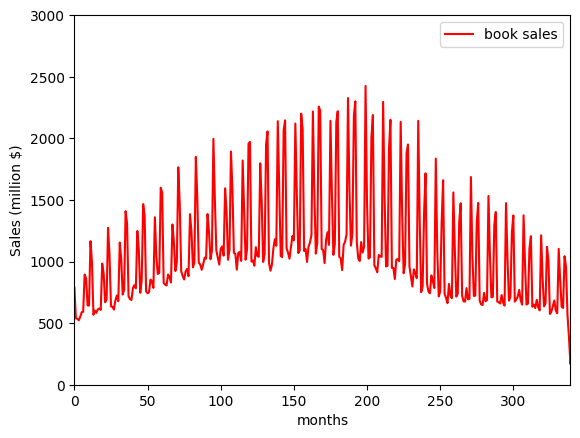

In [17]:
x = range(len(sales))
plt.plot(x, sales, 'r-', label='book sales')
plt.axis([0, 339, 00, 3000.0])
plt.xlabel("months")
plt.ylabel('Sales (million $)')
plt.legend()
plt.show()

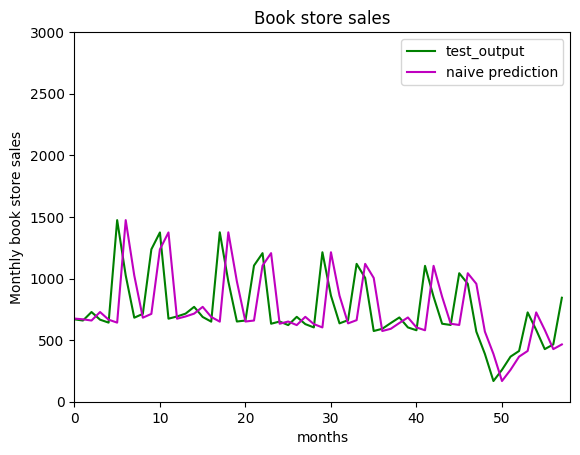

In [18]:
# Plot naive prediction
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [19]:

# Standardize train and test data.
# Use only training seasons to compute mean and stddev.
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [20]:
# Create training examples.
train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1))
train_y = np.zeros((train_months-MIN, 1))
for i in range(0, train_months-MIN):
    train_X[i, -(i+MIN):, 0] = train_sales_std[0:i+MIN]
    train_y[i, 0] = train_sales_std[i+MIN]

# Create test examples.
test_months = len(test_sales)
test_X = np.zeros((test_months-MIN, test_months-1, 1))
test_y = np.zeros((test_months-MIN, 1))
for i in range(0, test_months-MIN):
    test_X[i, -(i+MIN):, 0] = test_sales_std[0:i+MIN]
    test_y[i, 0] = test_sales_std[i+MIN]

In [22]:
# Create RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu',
                    input_shape=(None, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam',
              metrics =['mean_absolute_error'])
model.summary()
history = model.fit(train_X, train_y,
                    validation_data
                    = (test_X, test_y), epochs=EPOCHS,
                    batch_size=BATCH_SIZE, verbose=2,
                    shuffle=True)

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 - 3s - 170ms/step - loss: 0.7447 - mean_absolute_error: 0.6844 - val_loss: 0.4638 - val_mean_absolute_error: 0.6196
Epoch 2/100
17/17 - 1s - 41ms/step - loss: 0.4080 - mean_absolute_error: 0.4768 - val_loss: 0.1990 - val_mean_absolute_error: 0.3554
Epoch 3/100
17/17 - 1s - 41ms/step - loss: 0.1709 - mean_absolute_error: 0.3183 - val_loss: 0.1867 - val_mean_absolute_error: 0.3565
Epoch 4/100
17/17 - 1s - 39ms/step - loss: 0.1013 - mean_absolute_error: 0.2549 - val_loss: 0.1002 - val_mean_absolute_error: 0.2460
Epoch 5/100
17/17 - 1s - 41ms/step - loss: 0.0771 - mean_absolute_error: 0.2101 - val_loss: 0.0588 - val_mean_absolute_error: 0.1683
Epoch 6/100
17/17 - 1s - 40ms/step - loss: 0.0475 - mean_absolute_error: 0.1658 - val_loss: 0.0429 - val_mean_absolute_error: 0.1379
Epoch 7/100
17/17 - 1s - 39ms/step - loss: 0.0421 - mean_absolute_error: 0.1563 - val_loss: 0.0646 - val_mean_absolute_error: 0.1789
Epoch 8/100
17/17 - 1s - 38ms/step - loss: 0.0486 - mean_absolute_er

In [23]:

# Create naive prediction based on standardized data.
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]
mean_squared_error = np.mean(np.square(naive_prediction
                                       - test_output))
mean_abs_error = np.mean(np.abs(naive_prediction
                                - test_output))
print('naive test mse: ', mean_squared_error)
print('naive test mean abs: ', mean_abs_error)

naive test mse:  0.47230326787207016
naive test mean abs:  0.4805238634691167


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


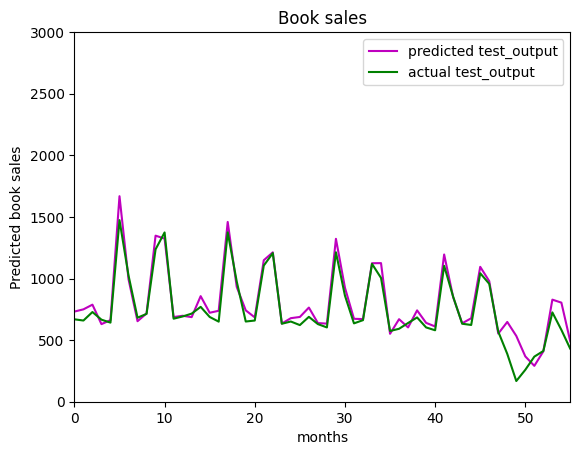

In [24]:
# Use trained model to predict the test data
predicted_test = model.predict(test_X, len(test_X))
predicted_test = np.reshape(predicted_test,
                            (len(predicted_test)))
predicted_test = predicted_test * stddev + mean

# Plot test prediction.
x = range(len(test_sales)-MIN)
plt.plot(x, predicted_test, 'm-',
         label='predicted test_output')
plt.plot(x, test_sales[-(len(test_sales)-MIN):],
         'g-', label='actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()